In [2]:
import sys, os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

rpath = os.path.abspath('..')
if rpath not in sys.path:
    sys.path.insert(0, rpath)

from utils import DatabaseEngine

In [3]:
db_engine = DatabaseEngine()
engine = db_engine.create()
clean_df = pd.read_sql_table("clean_xdr_data", con=engine)

Successfully connected to the PostgreSQL "telecom" database


In [4]:
data_df = pd.read_csv('../data/user_info.csv')

In [5]:
# concatinate the two dataframes
df = pd.concat([clean_df, data_df], axis=1)

#### Relevant variables and associated data types

In [6]:
# relevant variables and associated data types of df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 74 columns):
 #   Column                                    Non-Null Count   Dtype  
---  ------                                    --------------   -----  
 0   Bearer Id                                 150000 non-null  object 
 1   Start                                     150000 non-null  object 
 2   Start ms                                  150000 non-null  float64
 3   End                                       150000 non-null  object 
 4   End ms                                    150000 non-null  float64
 5   Dur. (ms)                                 150000 non-null  float64
 6   IMSI                                      150000 non-null  object 
 7   MSISDN/Number                             150000 non-null  object 
 8   IMEI                                      150000 non-null  object 
 9   Last Location Name                        150000 non-null  object 
 10  Avg RTT DL (ms)     

#### Analyzing the basic metrics of the dataset

In [10]:
df.describe()

,Start ms,End ms,Dur. (ms),Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),Avg Bearer TP UL (kbps),TCP DL Retrans. Vol (Bytes),TCP UL Retrans. Vol (Bytes),DL TP < 50 Kbps (%),...,Email Download Data,Email Upload Data,Youtube Download Data,Youtube Upload Data,Netflix Download Data,Netflix Upload Data,Gaming Download Data,Gaming Upload Data,Other Download Data,Other Upload Data
count,150000.000000,150000.000000,1.500000e+05,150000.000000,150000.000000,150000.000000,150000.000000,1.500000e+05,1.500000e+05,150000.000000,...,1.068560e+05,1.068560e+05,1.068560e+05,1.068560e+05,1.068560e+05,1.068560e+05,1.068560e+05,1.068560e+05,1.068560e+05,1.068560e+05
mean,499.188200,498.800880,1.046086e+05,109.795706,17.662883,13300.045927,1770.428647,2.080991e+07,7.596587e+05,92.844754,...,2.497352e+06,6.514435e+05,1.621461e+07,1.534379e+07,1.620639e+07,1.533194e+07,5.882158e+08,1.155326e+07,5.869916e+08,1.151716e+07
std,288.611834,288.097653,8.103762e+04,559.344484,76.530188,23971.878541,4625.355500,1.172360e+08,1.577621e+07,13.005265,...,1.897063e+06,4.948601e+05,1.232294e+07,1.159870e+07,1.231717e+07,1.161060e+07,4.440290e+08,8.731469e+06,4.437790e+08,8.706879e+06
min,0.000000,0.000000,7.142000e+03,0.000000,0.000000,0.000000,0.000000,2.000000e+00,1.000000e+00,0.000000,...,9.700000e+01,1.400000e+01,5.300000e+01,1.060000e+02,4.200000e+01,3.500000e+01,2.516000e+03,5.900000e+01,3.290000e+03,1.560000e+02
25%,250.000000,251.000000,5.744050e+04,35.000000,3.000000,43.000000,47.000000,1.332913e+06,6.300775e+04,91.000000,...,1.184544e+06,3.065678e+05,7.647143e+06,7.246758e+06,7.593534e+06,7.206775e+06,2.793230e+08,5.445849e+06,2.767785e+08,5.461189e+06
50%,499.000000,500.000000,8.639900e+04,54.000000,7.000000,63.000000,63.000000,2.080991e+07,7.596587e+05,100.000000,...,2.266259e+06,5.872975e+05,1.460547e+07,1.386731e+07,1.463991e+07,1.387814e+07,5.325190e+08,1.044654e+07,5.299489e+08,1.037673e+07
75%,749.000000,750.000000,1.324302e+05,109.795706,17.662883,19710.750000,1120.000000,2.080991e+07,7.596587e+05,100.000000,...,3.250651e+06,8.525612e+05,2.112900e+07,1.997808e+07,2.113463e+07,2.000853e+07,7.669561e+08,1.508080e+07,7.653643e+08,1.502752e+07
max,999.000000,999.000000,1.859336e+06,96923.000000,7120.000000,378160.000000,58613.000000,4.294426e+09,2.908226e+09,100.000000,...,3.360721e+07,9.013997e+06,2.378830e+08,2.150757e+08,1.994792e+08,2.032419e+08,7.622035e+09,1.547897e+08,8.025477e+09,1.529305e+08


In [8]:
exclude_columns = ['Bearer Id', 'IMSI', 'MSISDN/Number', 'IMEI']
column_list = [col for col in df.select_dtypes(include=['int64', 'float64']).columns if col not in exclude_columns]

for column in column_list:
    print(f"--- {column} ---")
    print(f"Range: {df[column].max()} - {df[column].min()}")
    print(f"Variance: {df[column].var()}")
    print(f"Standard Deviation: {df[column].std()}")
    print(f"IQR: {df[column].quantile(0.75) - df[column].quantile(0.25)}")

--- Start ms ---
Range: 999.0 - 0.0
Variance: 83296.79086603242
Standard Deviation: 288.6118342445999
IQR: 499.0
--- End ms ---
Range: 999.0 - 0.0
Variance: 83000.25777961081
Standard Deviation: 288.09765320045705
IQR: 499.0
--- Dur. (ms) ---
Range: 1859336.0 - 7142.0
Variance: 6567096094.97398
Standard Deviation: 81037.62147900184
IQR: 74989.75
--- Avg RTT DL (ms) ---
Range: 96923.0 - 0.0
Variance: 312866.2519751957
Standard Deviation: 559.34448417339
IQR: 74.79570605376027
--- Avg RTT UL (ms) ---
Range: 7120.0 - 0.0
Variance: 5856.869708950498
Standard Deviation: 76.53018821975088
IQR: 14.662882910900326
--- Avg Bearer TP DL (kbps) ---
Range: 378160.0 - 0.0
Variance: 574650960.8066627
Standard Deviation: 23971.878541463175
IQR: 19667.75
--- Avg Bearer TP UL (kbps) ---
Range: 58613.0 - 0.0
Variance: 21393913.50459873
Standard Deviation: 4625.355500347917
IQR: 1073.0
--- TCP DL Retrans. Vol (Bytes) ---
Range: 4294425570.0 - 2.0
Variance: 1.3744271913157576e+16
Standard Deviation: 11723

#### Univarate Analysis

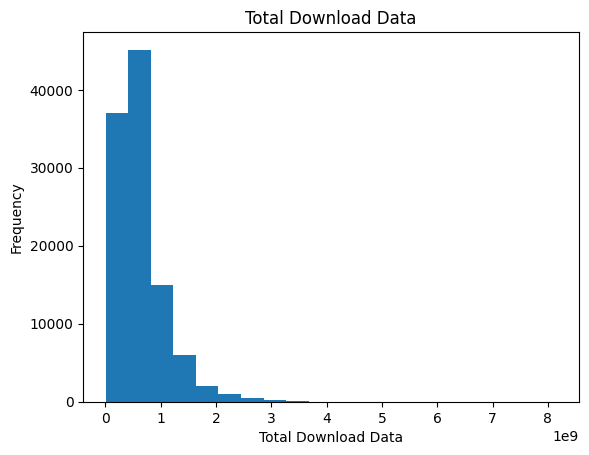

In [75]:
#Total Download Data
plt.hist(df['Total Download Data'], bins=20)
plt.xlabel('Total Download Data')
plt.ylabel('Frequency')
plt.title('Total Download Data')
plt.show()

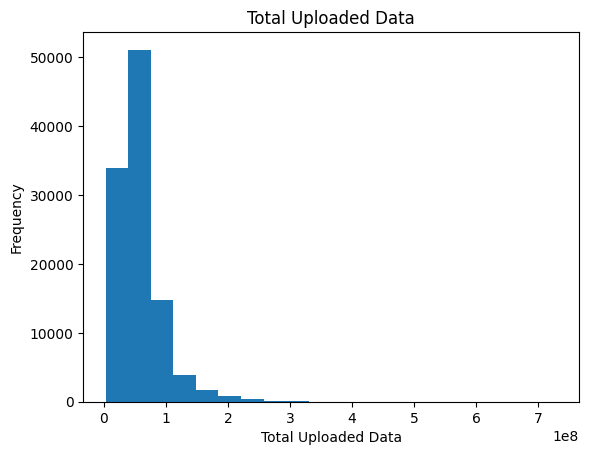

In [78]:
#Total Uploaded Data
plt.hist(df['Total Upload Data'], bins=20)
plt.xlabel('Total Uploaded Data')
plt.ylabel('Frequency')
plt.title('Total Uploaded Data')
plt.show()

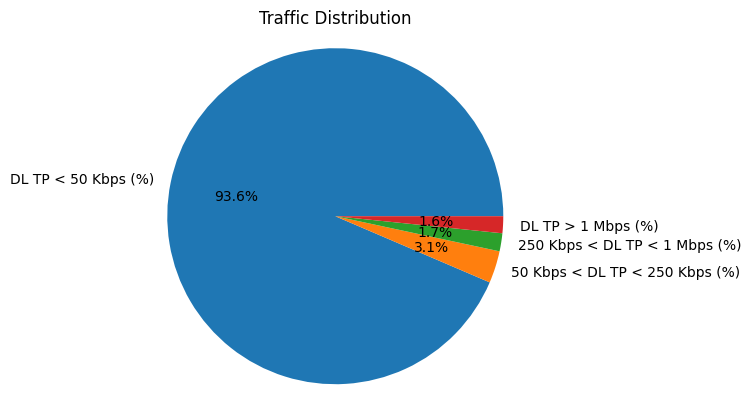

In [79]:
# Traffic Distribution
labels = ['DL TP < 50 Kbps (%)', '50 Kbps < DL TP < 250 Kbps (%)', '250 Kbps < DL TP < 1 Mbps (%)', 'DL TP > 1 Mbps (%)']
sizes = [df[label].mean() for label in labels]

plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.title('Traffic Distribution')
plt.axis('equal')
plt.show()

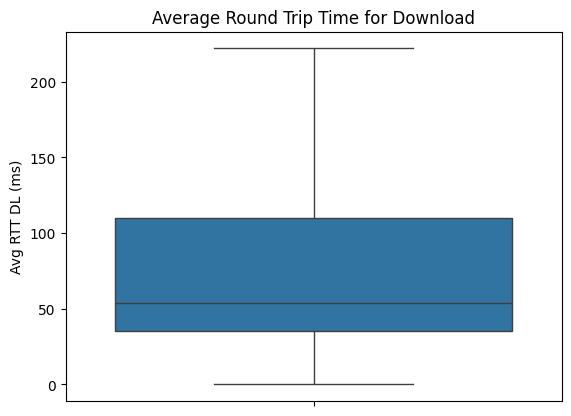

In [11]:
# Handling Outliers by Capping
q1 = df['Avg RTT DL (ms)'].quantile(0.25)
q3 = df['Avg RTT DL (ms)'].quantile(0.75)
iqr = q3 - q1

# Define upper and lower bounds
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

# Cap outliers
df['Avg RTT DL (ms)'] = df['Avg RTT DL (ms)'].apply(lambda x: upper_bound if x > upper_bound else (lower_bound if x < lower_bound else x))

# Plot of Average RTT DL
sns.boxplot(y=df['Avg RTT DL (ms)'])
plt.ylabel('Avg RTT DL (ms)')
plt.title('Average Round Trip Time for Download')
plt.show()


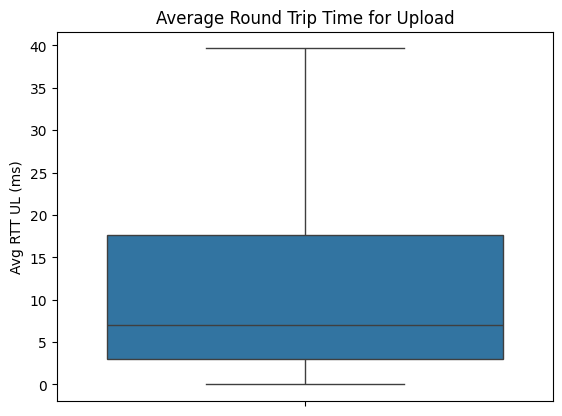

In [81]:
# Handling Outliers by Capping
q1 = df['Avg RTT UL (ms)'].quantile(0.25)
q3 = df['Avg RTT UL (ms)'].quantile(0.75)
iqr = q3 - q1

# Define upper and lower bounds
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

# Cap outliers
df['Avg RTT UL (ms)'] = df['Avg RTT UL (ms)'].apply(lambda x: upper_bound if x > upper_bound else (lower_bound if x < lower_bound else x))


# Plot of Average RTT UL
sns.boxplot(y=df['Avg RTT UL (ms)'])
plt.ylabel('Avg RTT UL (ms)')
plt.title('Average Round Trip Time for Upload')
plt.show()

#### Bivarate Analysis

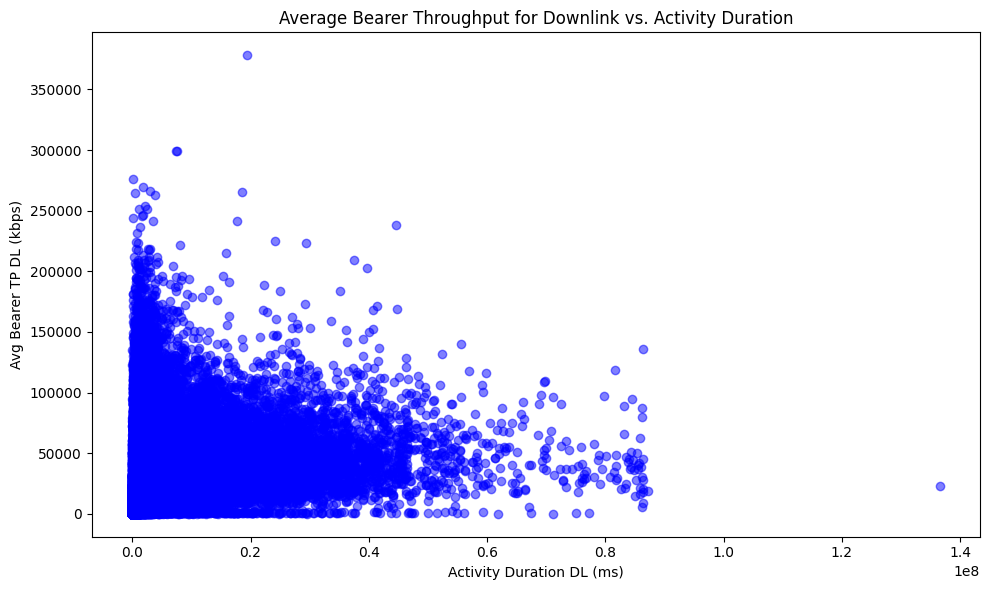

In [82]:
activity_duration = df['Activity Duration DL (ms)']
avg_bearer_throughput = df['Avg Bearer TP DL (kbps)']

plt.figure(figsize=(10, 6))
plt.scatter(activity_duration, avg_bearer_throughput, color='blue', alpha=0.5)
plt.xlabel('Activity Duration DL (ms)')
plt.ylabel('Avg Bearer TP DL (kbps)')
plt.title('Average Bearer Throughput for Downlink vs. Activity Duration')
plt.tight_layout()
plt.show()


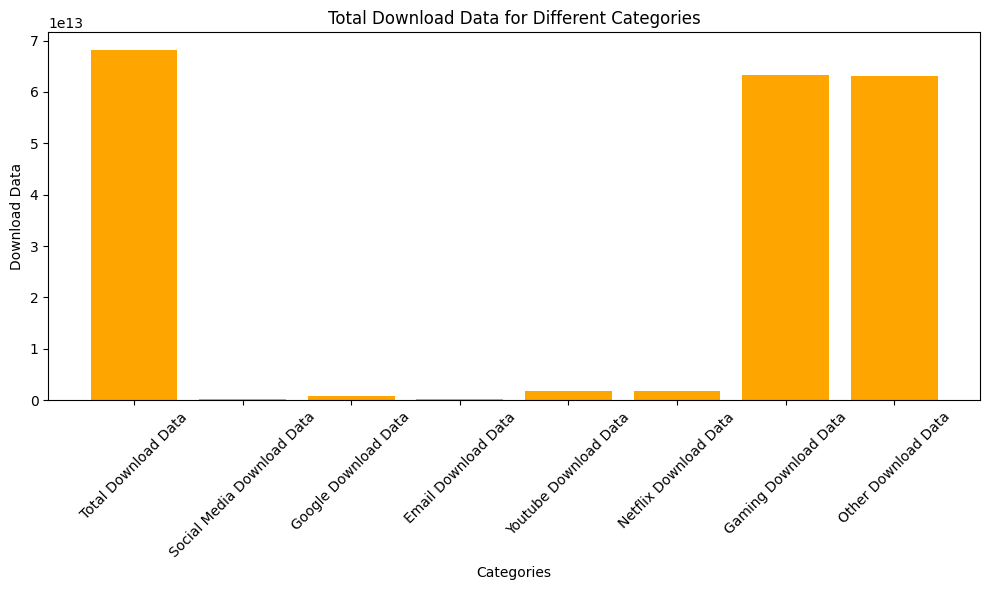

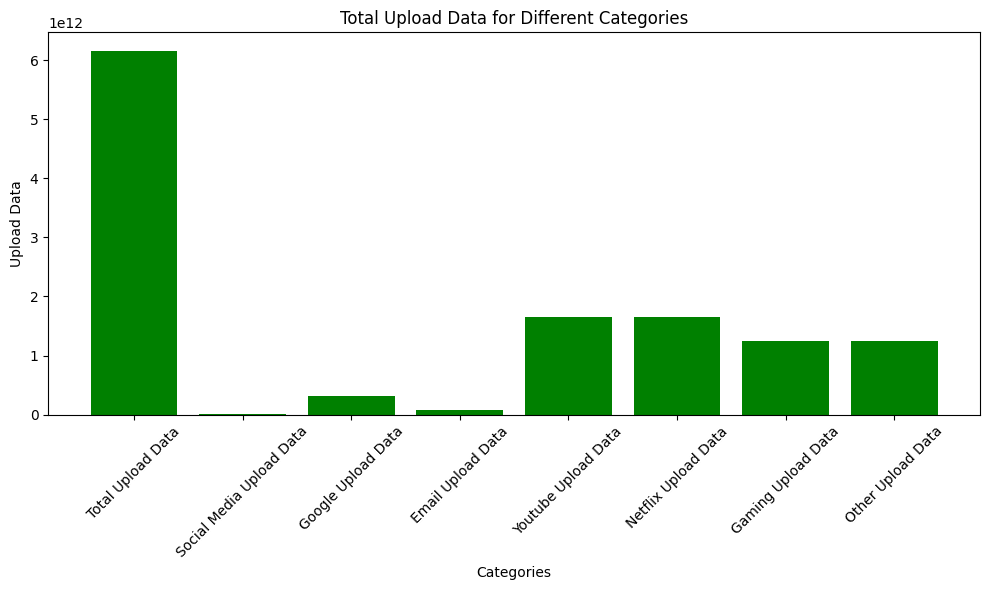

In [58]:
# plot for total download and applications download data
user_info = {
    'Total DL (Bytes)': 'Total Download Data',
    'Social Media DL (Bytes)': 'Social Media Download Data',
    'Google DL (Bytes)': 'Google Download Data',
    'Email DL (Bytes)': 'Email Download Data',
    'Youtube DL (Bytes)': 'Youtube Download Data',
    'Netflix DL (Bytes)': 'Netflix Download Data',
    'Gaming DL (Bytes)': 'Gaming Download Data',
    'Other DL (Bytes)': 'Other Download Data',
    
    'Total UL (Bytes)': 'Total Upload Data',
    'Social Media UL (Bytes)': 'Social Media Upload Data',
    'Google UL (Bytes)': 'Google Upload Data',
    'Email UL (Bytes)': 'Email Upload Data',
    'Youtube UL (Bytes)': 'Youtube Upload Data',
    'Netflix UL (Bytes)': 'Netflix Upload Data',
    'Gaming UL (Bytes)': 'Gaming Upload Data',
    'Other UL (Bytes)': 'Other Upload Data'
}

# Selecting columns for download and upload
download_columns = [
    'Total DL (Bytes)',
    'Social Media DL (Bytes)',
    'Google DL (Bytes)',
    'Email DL (Bytes)',
    'Youtube DL (Bytes)',
    'Netflix DL (Bytes)',
    'Gaming DL (Bytes)',
    'Other DL (Bytes)'
]

upload_columns = [
    'Total UL (Bytes)',
    'Social Media UL (Bytes)',
    'Google UL (Bytes)',
    'Email UL (Bytes)',
    'Youtube UL (Bytes)',
    'Netflix UL (Bytes)',
    'Gaming UL (Bytes)',
    'Other UL (Bytes)'
]

# Extracting download and upload data
download_data = df[download_columns].sum()
upload_data = df[upload_columns].sum()

# Plotting Download Data
plt.figure(figsize=(10, 6))
plt.bar(download_data.index.map(user_info), download_data.values, color='orange')
plt.title('Total Download Data for Different Categories')
plt.xlabel('Categories')
plt.ylabel('Download Data')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plotting Upload Data
plt.figure(figsize=(10, 6))
plt.bar(upload_data.index.map(user_info), upload_data.values, color='green')
plt.title('Total Upload Data for Different Categories')
plt.xlabel('Categories')
plt.ylabel('Upload Data')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### Variable Transformations

In [17]:
# Create decile classes based on 'Total Session Duration'
df['Decile Class'] = pd.qcut(df['Total Session Duration'], 10, labels=False)

# Filter for top five decile classes
df_top_five = df[df['Decile Class'] >= 5].copy()

# Compute total data (DL+UL) per decile class
df_top_five.loc[:, 'Total Data'] = df_top_five['Total Download Data'] + df_top_five['Total Upload Data']
total_data_per_decile = df_top_five.groupby('Decile Class')['Total Data'].sum()
pd.DataFrame(total_data_per_decile)

,Total Data
Decile Class,
5.0,6.426251e+12
6.0,6.152478e+12
7.0,7.822234e+12
8.0,9.305495e+12
9.0,1.486393e+13


#### Correlation Analysis

In [23]:
# Select the columns for correlation analysis
data_for_correlation = df[['Total DL (Bytes)', 'Social Media DL (Bytes)', 'Google DL (Bytes)', 'Email DL (Bytes)', 'Youtube DL (Bytes)',
                            'Netflix DL (Bytes)', 'Gaming DL (Bytes)', 'Other DL (Bytes)', 'Total UL (Bytes)', 'Social Media UL (Bytes)', 
                            'Google UL (Bytes)', 'Email UL (Bytes)', 'Youtube UL (Bytes)', 'Netflix UL (Bytes)', 'Gaming UL (Bytes)', 'Other UL (Bytes)']]


# Compute the correlation matrix
correlation_matrix = data_for_correlation.corr()

col_info = {
    'Total DL (Bytes)': 'Total Download Data',
    'Social Media DL (Bytes)': 'Social Media Download Data',
    'Google DL (Bytes)': 'Google Download Data',
    'Email DL (Bytes)': 'Email Download Data',
    'Youtube DL (Bytes)': 'Youtube Download Data',
    'Netflix DL (Bytes)': 'Netflix Download Data',
    'Gaming DL (Bytes)': 'Gaming Download Data',
    'Other DL (Bytes)': 'Other Download Data',
    
    'Total UL (Bytes)': 'Total Upload Data',
    'Social Media UL (Bytes)': 'Social Media Upload Data',
    'Google UL (Bytes)': 'Google Upload Data',
    'Email UL (Bytes)': 'Email Upload Data',
    'Youtube UL (Bytes)': 'Youtube Upload Data',
    'Netflix UL (Bytes)': 'Netflix Upload Data',
    'Gaming UL (Bytes)': 'Gaming Upload Data',
    'Other UL (Bytes)': 'Other Upload Data'
}

# Assume user_info is your dictionary
correlation_matrix = correlation_matrix.rename(columns=col_info, index=col_info)
# Print the correlation matrix
correlation_matrix

,Total DL (Bytes),Social Media DL (Bytes),Google DL (Bytes),Email DL (Bytes),Youtube DL (Bytes),Netflix DL (Bytes),Gaming DL (Bytes),Other DL (Bytes),Total UL (Bytes),Social Media UL (Bytes),Google UL (Bytes),Email UL (Bytes),Youtube UL (Bytes),Netflix UL (Bytes),Gaming UL (Bytes),Other UL (Bytes)
Total DL (Bytes),1.000000,0.005164,0.012189,0.004395,0.025685,0.024386,0.999131,-0.002709,-0.001895,0.000206,0.001129,-0.002516,-0.002301,-0.000979,0.001067,-0.001324
Social Media DL (Bytes),0.005164,1.000000,-0.001954,0.004745,-0.001389,-0.001817,0.001018,0.006126,0.004798,-0.000555,0.000186,-0.002518,0.002345,0.003457,0.003095,0.000610
Google DL (Bytes),0.012189,-0.001954,1.000000,-0.000039,0.001760,0.000548,-0.001421,-0.002557,-0.001492,0.003542,-0.000103,0.000742,0.000638,-0.001569,-0.001429,-0.000882
Email DL (Bytes),0.004395,0.004745,-0.000039,1.000000,0.001679,0.001351,0.000050,-0.000444,-0.002346,0.004823,-0.001157,0.002553,-0.004305,-0.000016,-0.004335,0.004675
Youtube DL (Bytes),0.025685,-0.001389,0.001760,0.001679,1.000000,0.001202,-0.001861,0.002042,-0.000384,-0.001786,0.001122,-0.000320,0.002433,0.001746,-0.001893,-0.004830
Netflix DL (Bytes),0.024386,-0.001817,0.000548,0.001351,0.001202,1.000000,-0.003201,-0.006000,-0.000662,-0.000772,-0.001288,-0.000011,0.000423,0.001065,-0.000633,-0.002588
Gaming DL (Bytes),0.999131,0.001018,-0.001421,0.000050,-0.001861,-0.003201,1.000000,-0.002591,-0.001858,0.000210,0.001140,-0.002519,-0.002382,-0.001051,0.001162,-0.001131
Other DL (Bytes),-0.002709,0.006126,-0.002557,-0.000444,0.002042,-0.006000,-0.002591,1.000000,-0.001921,-0.003850,0.002097,-0.003805,0.002296,-0.006691,-0.002381,0.003421
Total UL (Bytes),-0.001895,0.004798,-0.001492,-0.002346,-0.000384,-0.000662,-0.001858,-0.001921,1.000000,-0.000204,0.102113,0.022332,0.563917,0.561779,0.419690,0.417413
Social Media UL (Bytes),0.000206,-0.000555,0.003542,0.004823,-0.001786,-0.000772,0.000210,-0.003850,-0.000204,1.000000,0.001085,-0.001427,-0.002368,-0.002493,0.000844,0.000971
